# Ecommerce Fraud Detection EDA + Feature Engg. + ML

# Objective:
Ecommerce Transaction to Detect the How Many Customer Transaction wheather Fraud / Not.

# Libraries Used:
Pandas - Data manipulation and Analysis

Numpy - Numerical computing tasks

Seaborn - Data Visualisation

Matplotlib.pyplot - Plotting Graphs and Visualisation 

# Import all Libraries.

In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Data Ingesction.

In [324]:
# Import Dataset 1.

In [325]:
df1=pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\Data Analyst\Project\Customer_DF (1).csv")

In [326]:
df1.head(2)

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True


In [327]:
# Import Dataset 2.

In [328]:
df2=pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\Data Analyst\Project\cust_transaction_details (1).csv")

In [329]:
df2.head(2)

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled


In [330]:
# we analysis Both Dataset we got primary columns i.e 'customerEmail'

# 2. Marge Both Dataset df1 & df2.

In [331]:
df=pd.merge(df1,df2,on='customerEmail')

In [332]:
# Check Top 5 Rows.

In [333]:
df.head()

,Unnamed: 0_x,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Unnamed: 0_y,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,0,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,1,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,2,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,3,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,4,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [334]:
# Check Buttom 5 Rows.

In [335]:
df.tail()

,Unnamed: 0_x,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Unnamed: 0_y,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
814,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,618,7yilsi1o,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,1,fulfilled
815,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,619,c82k5bcv,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,0,fulfilled
816,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,620,wmh52bns,1bubxa,3zmkegkb8,0,paypal,JCB 15 digit,25,1,fulfilled
817,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,621,xdw33hfp,p0gdbf,3zmkegkb8,0,paypal,JCB 15 digit,19,0,fulfilled
818,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,622,wgmajf82,5lmvrj,f0xnu5om9,0,card,JCB 16 digit,27,0,fulfilled


# 3. Data Cleaning

In [336]:
df

,Unnamed: 0_x,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Unnamed: 0_y,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,0,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,1,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,2,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,3,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,4,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,618,7yilsi1o,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,1,fulfilled
815,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,619,c82k5bcv,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,0,fulfilled
816,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,620,wmh52bns,1bubxa,3zmkegkb8,0,paypal,JCB 15 digit,25,1,fulfilled
817,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,621,xdw33hfp,p0gdbf,3zmkegkb8,0,paypal,JCB 15 digit,19,0,fulfilled


In [337]:
# Drop Unwanted Columns in Data.

In [338]:
df.drop(['Unnamed: 0_x','Unnamed: 0_y'],axis=1,inplace=True)

In [339]:
df.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [340]:
# Checking Null Values in Data.

In [341]:
df.isnull().sum()

customerEmail                       0
customerPhone                       0
customerDevice                      0
customerIPAddress                   0
customerBillingAddress              0
No_Transactions                     0
No_Orders                           0
No_Payments                         0
Fraud                               0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
dtype: int64

In [342]:
# Plot a Heatmap to Check the Null Values in Dataframe.

<AxesSubplot:>

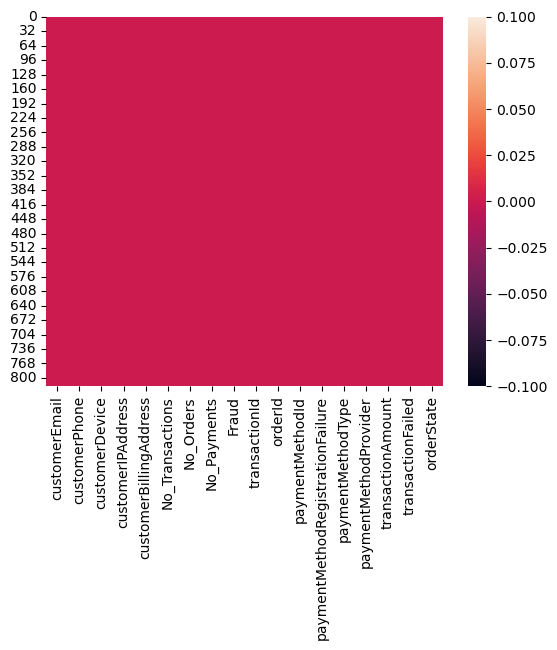

In [343]:
sns.heatmap(df.isnull())

In [344]:
# Check Duplicated Values in DataFrame.

In [345]:
df.duplicated().sum()

0

In [346]:
# Stastical Analysis.

In [347]:
df.describe()

,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,5.195360,3.808303,2.135531,0.100122,35.147741,0.256410
std,2.924214,1.866872,1.860001,0.300346,19.640072,0.436918
min,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,3.000000,3.000000,1.000000,0.000000,22.000000,0.000000
50%,5.000000,4.000000,2.000000,0.000000,34.000000,0.000000
75%,7.000000,5.000000,3.000000,0.000000,46.000000,1.000000
max,15.000000,8.000000,15.000000,1.000000,353.000000,1.000000


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 818
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   customerEmail                     819 non-null    object
 1   customerPhone                     819 non-null    object
 2   customerDevice                    819 non-null    object
 3   customerIPAddress                 819 non-null    object
 4   customerBillingAddress            819 non-null    object
 5   No_Transactions                   819 non-null    int64 
 6   No_Orders                         819 non-null    int64 
 7   No_Payments                       819 non-null    int64 
 8   Fraud                             819 non-null    bool  
 9   transactionId                     819 non-null    object
 10  orderId                           819 non-null    object
 11  paymentMethodId                   819 non-null    object
 12  paymentMethodRegistrat

# 4. Exploratroy Data Analysis.

<AxesSubplot:xlabel='paymentMethodType', ylabel='count'>

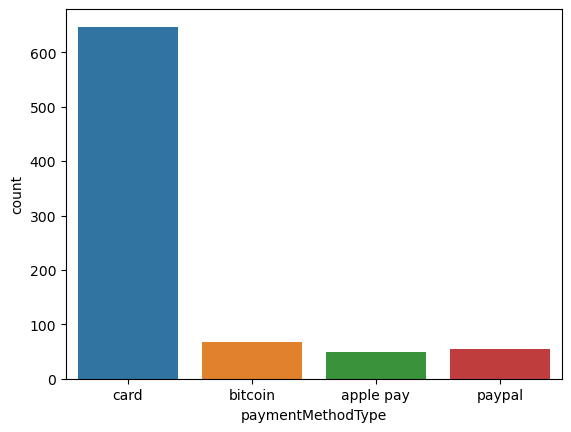

In [349]:
sns.countplot(df['paymentMethodType'])

Here, We see the most of the time payment done by the Card, then Bitcoin, Paypal and Apple Pay.

<AxesSubplot:xlabel='orderState', ylabel='count'>

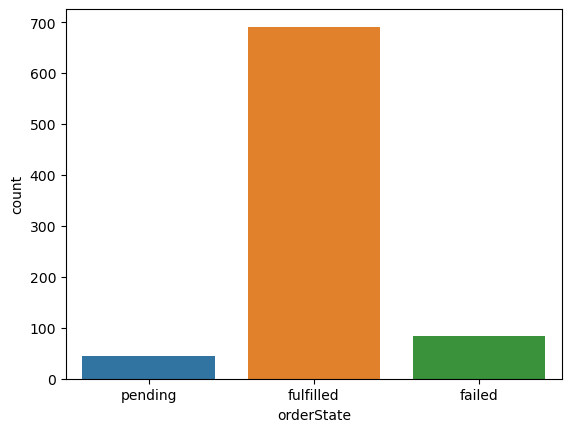

In [350]:
sns.countplot(df['orderState'])

Here,we See and Analysis the OrderSate Fulfilled 680, Failed 100 and Pending OrderSate is almost 50.

<AxesSubplot:xlabel='paymentMethodProvider', ylabel='count'>

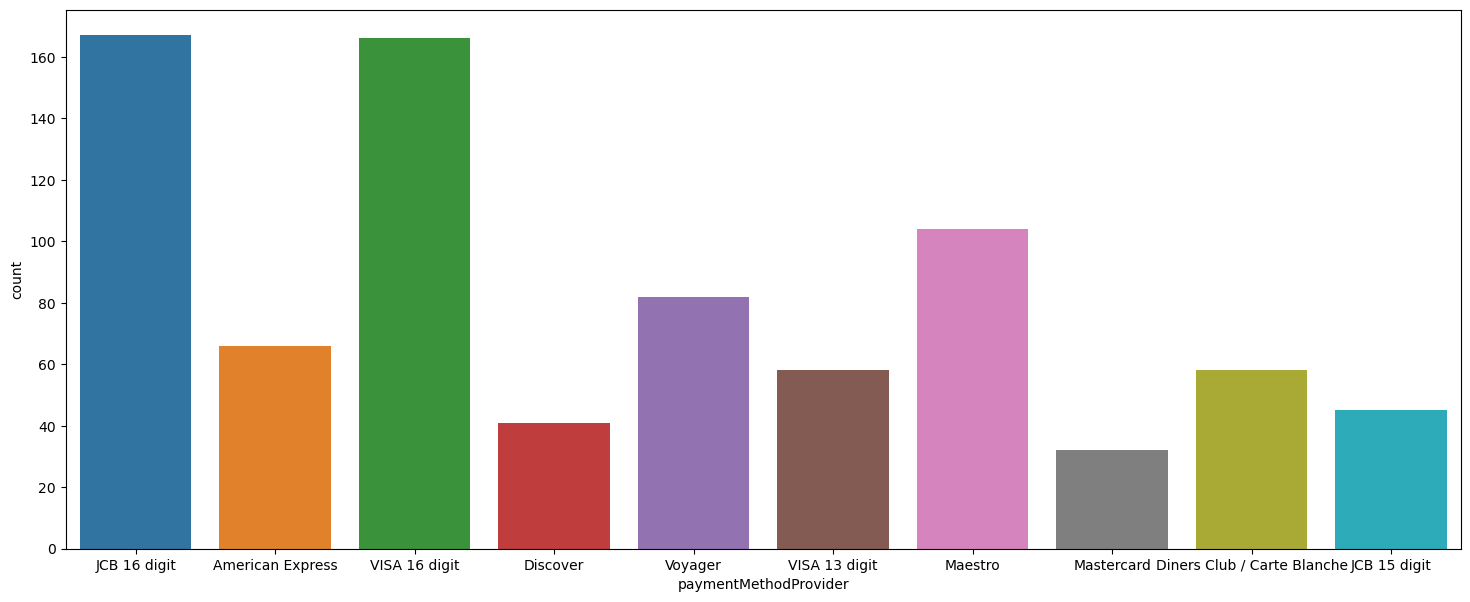

In [351]:
plt.figure(figsize=(18,7))
sns.countplot(df['paymentMethodProvider'])

**More Payments by 'VISA 16 digit' and 'JCB 16 digit' as compared to other payment method providers.**

<AxesSubplot:xlabel='No_Payments', ylabel='count'>

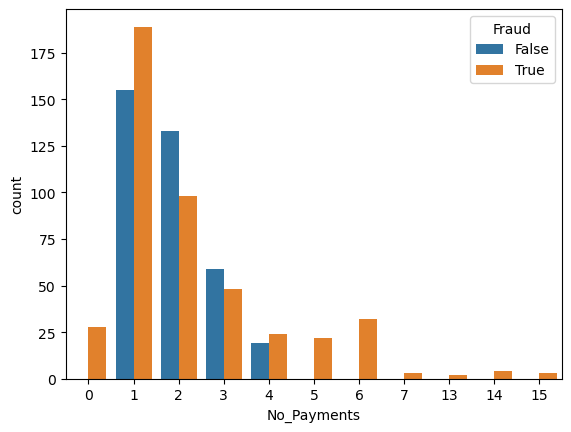

In [352]:
sns.countplot(df['No_Payments'],hue = df['Fraud'])

<AxesSubplot:xlabel='No_Transactions', ylabel='Density'>

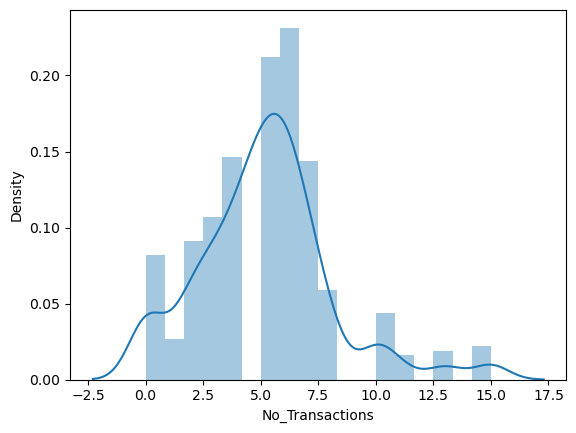

In [353]:
sns.distplot(df['No_Transactions'])

<AxesSubplot:xlabel='No_Orders', ylabel='Density'>

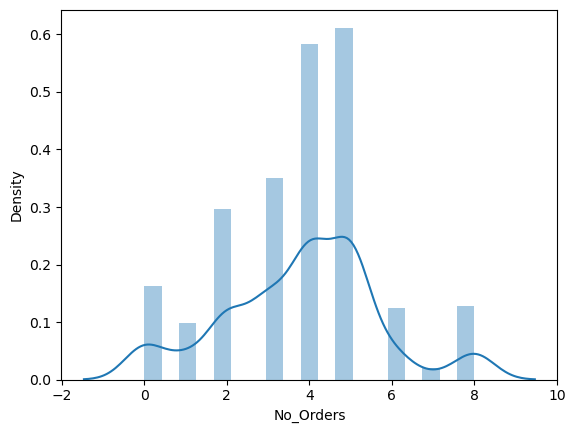

In [354]:
sns.distplot(df['No_Orders'])

<AxesSubplot:xlabel='No_Payments', ylabel='Count'>

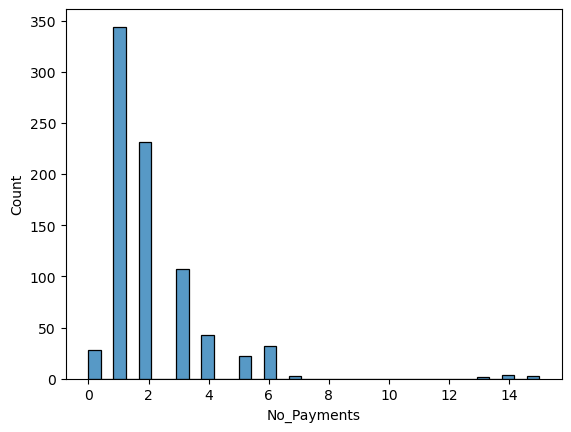

In [355]:
sns.histplot(df['No_Payments'])

<AxesSubplot:xlabel='transactionAmount', ylabel='Count'>

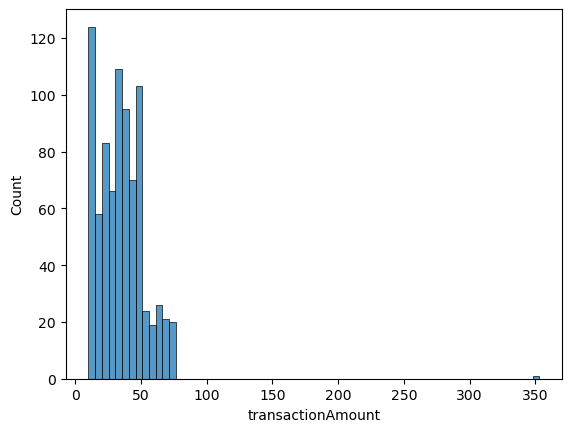

In [356]:
sns.histplot(df['transactionAmount'])

<AxesSubplot:xlabel='transactionFailed', ylabel='Count'>

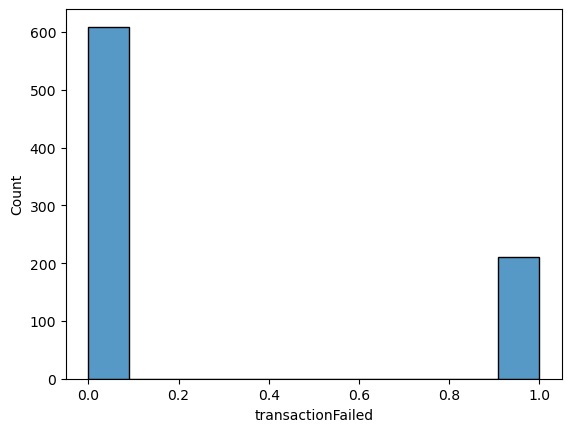

In [357]:
sns.histplot(df['transactionFailed'])

<AxesSubplot:xlabel='paymentMethodRegistrationFailure', ylabel='Count'>

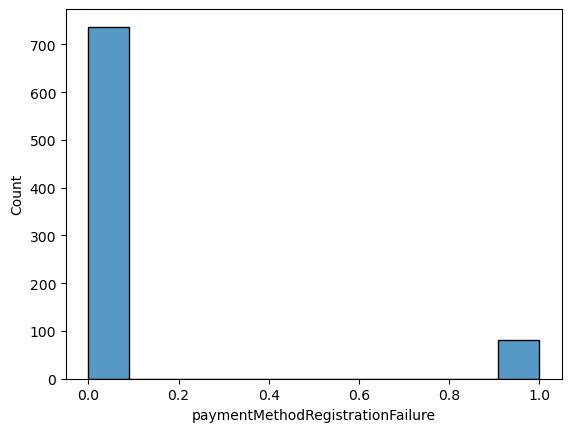

In [358]:
sns.histplot(df['paymentMethodRegistrationFailure'])

In [359]:
# Find Correlation.

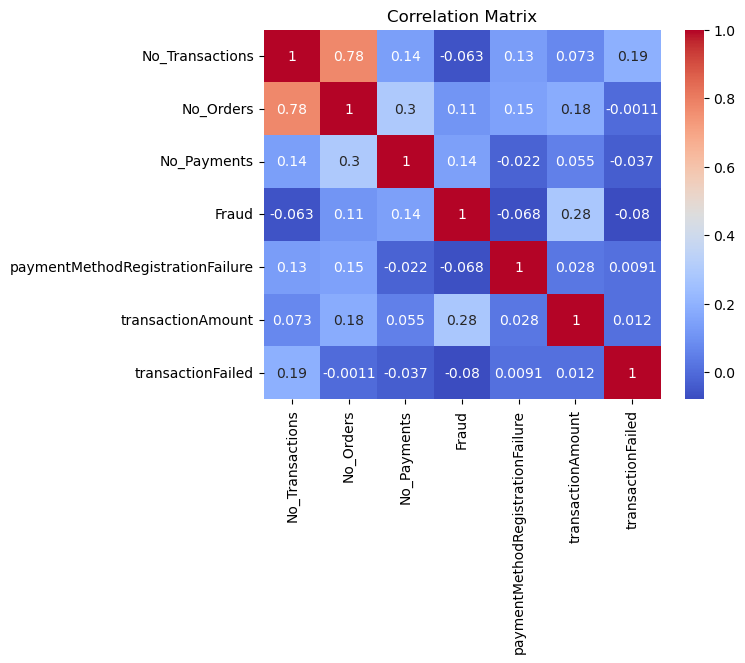

In [360]:
corr_matrix = df.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

# 5.Check Imblance or Balance Data.

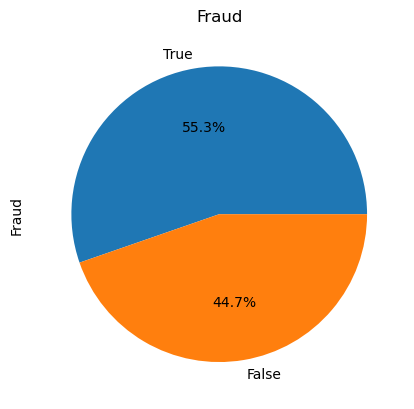

In [361]:
df['Fraud'].value_counts().plot(kind="pie",autopct="%.1f%%")
plt.title("Fraud")
plt.show()

***Here,we see 55.3% Fraud is True & 44.7% Fraud is False***

<AxesSubplot:xlabel='Fraud', ylabel='count'>

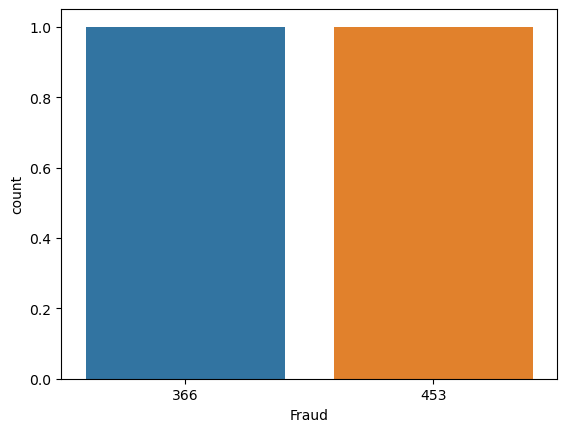

In [362]:
sns.countplot(df.Fraud.value_counts())

In [363]:
df.Fraud.value_counts()

True     453
False    366
Name: Fraud, dtype: int64

***Here, we see No Inbalance Data***

# 6. Outlier Handle

<AxesSubplot:>

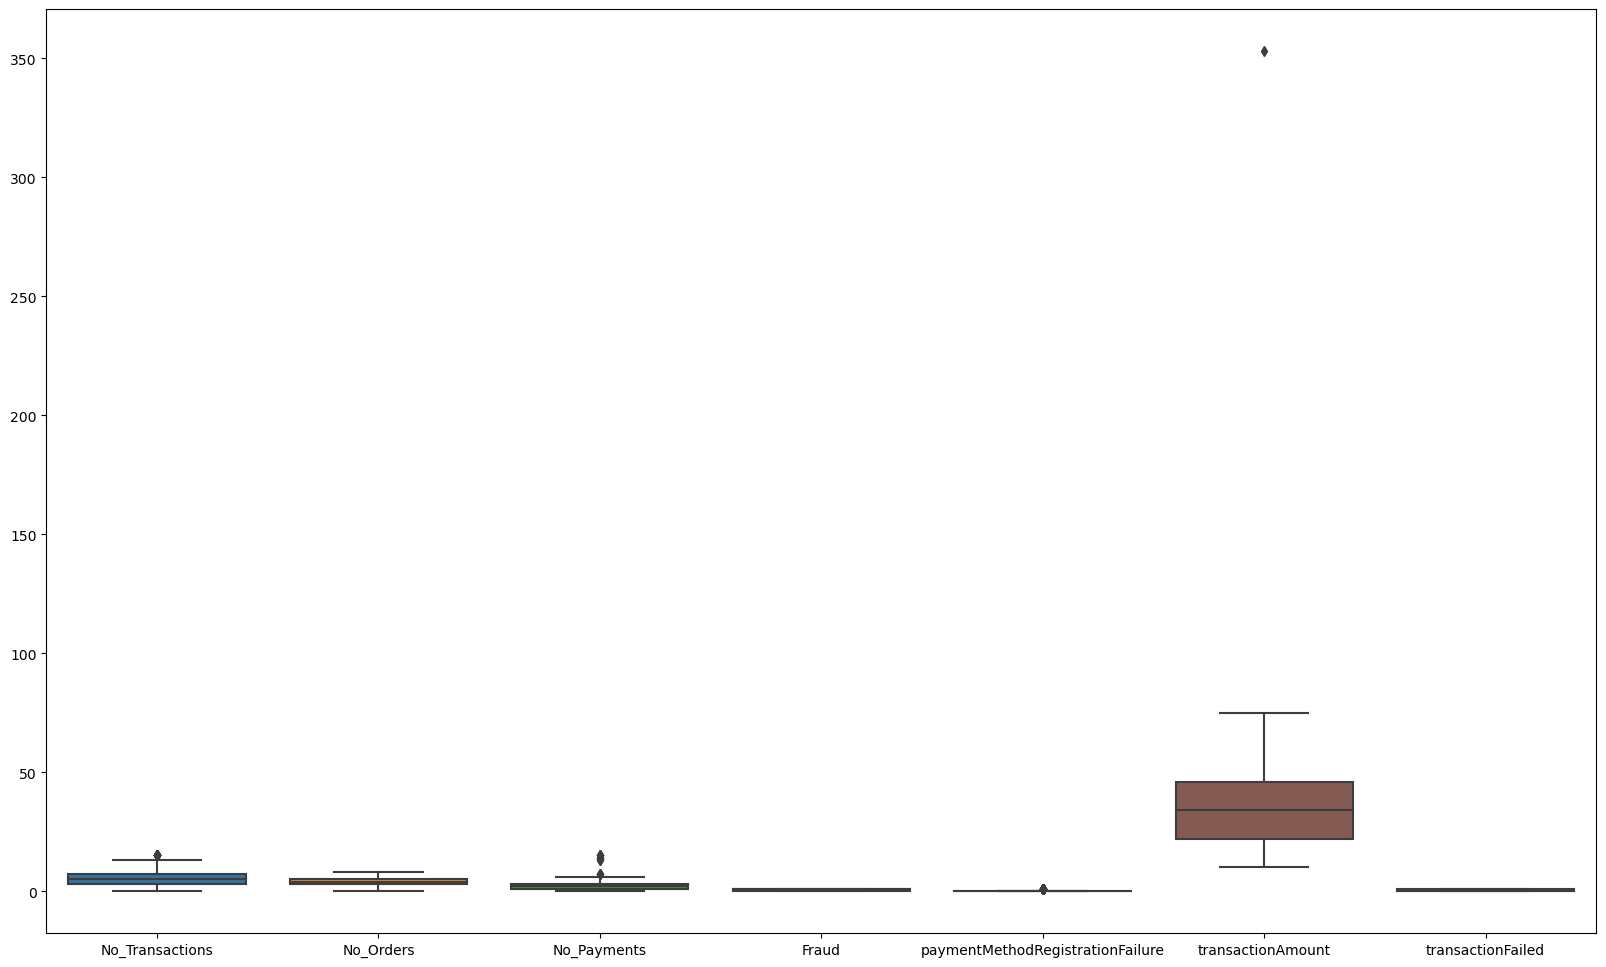

In [193]:
plt.figure(figsize=(20,12))
sns.boxplot(data=df)

***Here,we see some outlier present in data***

In [194]:
# Outlier in 'No_Transaction' 

<AxesSubplot:>

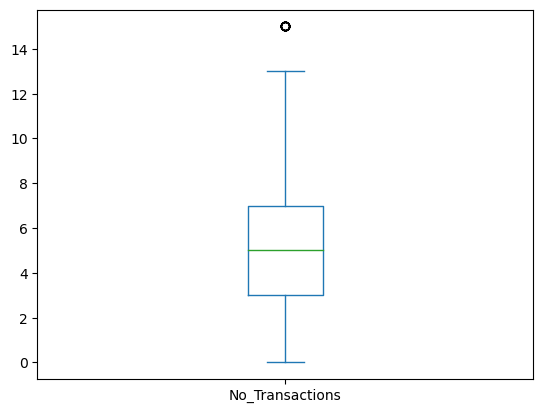

In [195]:
df['No_Transactions'].plot(kind='box')

***Here, we see some Outlier in data.***

In [196]:
q1,q3=np.percentile(df['No_Transactions'],[25,75])

In [197]:
q1,q3

(3.0, 7.0)

In [198]:
IQR=q3-q1

In [199]:
IQR

4.0

In [200]:
# Upper & Lower Bound

In [201]:
lower_bound = q1 -(1.5 * IQR) 
upper_bound = q3 +(1.5 * IQR)

In [202]:
lower_bound,upper_bound

(-3.0, 13.0)

In [203]:
# Capping Metohd.

In [204]:
outlier1=df.copy()
outlier1['No_Transactions']=np.where(
    outlier1['No_Transactions']>upper_bound, 
    upper_bound,
    np.where(
        outlier1['No_Transactions']<lower_bound,
        lower_bound,
        outlier1['No_Transactions']
    )  
)

<AxesSubplot:>

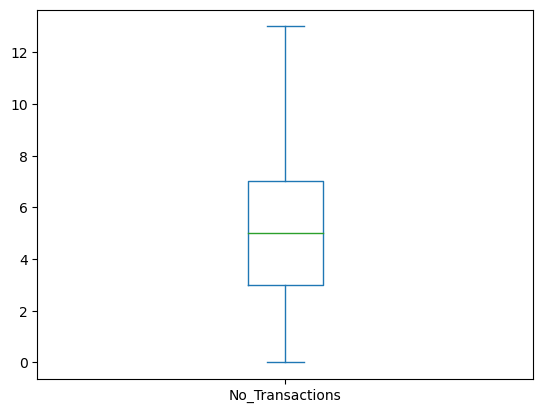

In [205]:
outlier1['No_Transactions'].plot(kind='box')

In [206]:
# Outlier in "No_Payments"

<AxesSubplot:>

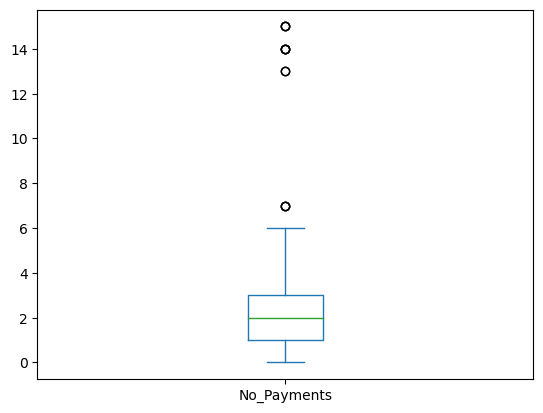

In [207]:
outlier1['No_Payments'].plot(kind='box')

In [208]:
# Check Skewness of Data.

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='No_Payments', ylabel='Density'>

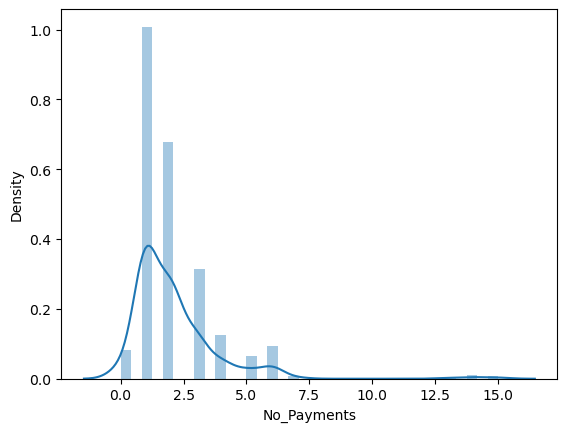

In [209]:
sns.distplot(outlier1['No_Payments'])

***Here, we see skewness is right.***

In [210]:
# IQR Method.

In [211]:
q1,q3=np.percentile(outlier1['No_Payments'],[25,75])

In [212]:
q1,q3

(1.0, 3.0)

In [213]:
# IQR.

In [214]:
IQR=q3-q1

In [215]:
IQR

2.0

In [216]:
# Upper & Lower Bound

In [217]:
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

In [218]:
lower_bound,upper_bound

(-2.0, 6.0)

In [219]:
# Capping Method

In [220]:
outlier2=outlier1.copy()
outlier2['No_Payments']=np.where(
    outlier2['No_Payments']>upper_bound, 
    upper_bound,
    np.where(
        outlier2['No_Payments']<lower_bound,
        lower_bound,
        outlier2['No_Payments']
    )  
)

<AxesSubplot:>

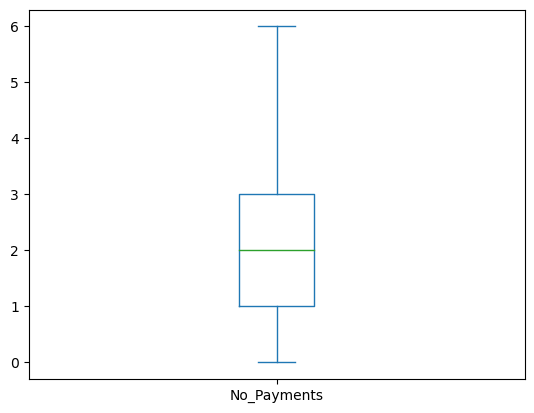

In [221]:
outlier2['No_Payments'].plot(kind='box')

In [222]:
# Outlier in "transactionAmount".

<AxesSubplot:>

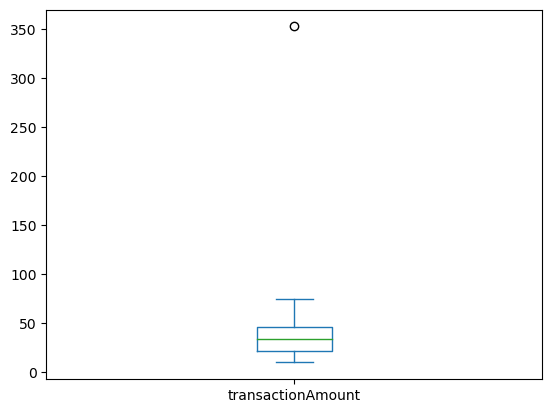

In [223]:
outlier2['transactionAmount'].plot(kind='box')

In [224]:
# Check Skewness

<AxesSubplot:xlabel='transactionAmount', ylabel='Density'>

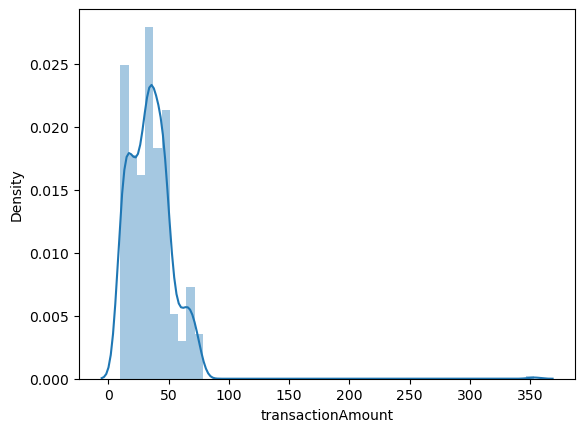

In [364]:
sns.distplot(outlier2['transactionAmount'])

***Here,we see skewness is right***

In [226]:
# IQR Method.

In [227]:
q1,q3=np.percentile(outlier2['transactionAmount'],[25,75])

In [228]:
q1,q3

(22.0, 46.0)

In [229]:
IQR=q3-q1

In [230]:
IQR

24.0

In [231]:
# Upper & Lower Bound.

In [232]:
lower_bound = q1 -(1.5 * IQR) 
upper_bound = q3 +(1.5 * IQR)

In [233]:
lower_bound,upper_bound

(-14.0, 82.0)

In [234]:
# Capping Method.

In [235]:
outlier3=outlier2.copy()
outlier3['transactionAmount']=np.where(
    outlier3['transactionAmount']>upper_bound, 
    upper_bound,
    np.where(
        outlier3['transactionAmount']<lower_bound,
        lower_bound,
        outlier3['transactionAmount']
    )  
)

<AxesSubplot:>

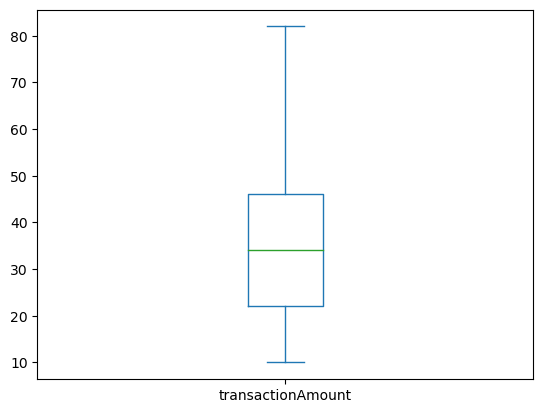

In [236]:
outlier3['transactionAmount'].plot(kind='box')

In [237]:
# Save Data in New Veriable.

In [238]:
Data=outlier3

In [239]:
Data

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2.0,2,1.0,False,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18.0,0,pending
1,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2.0,2,1.0,False,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26.0,0,fulfilled
2,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3.0,3,6.0,True,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45.0,0,fulfilled
3,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3.0,3,6.0,True,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23.0,0,fulfilled
4,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3.0,3,6.0,True,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43.0,1,fulfilled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7.0,5,4.0,False,7yilsi1o,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25.0,1,fulfilled
815,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7.0,5,4.0,False,c82k5bcv,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25.0,0,fulfilled
816,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7.0,5,4.0,False,wmh52bns,1bubxa,3zmkegkb8,0,paypal,JCB 15 digit,25.0,1,fulfilled
817,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7.0,5,4.0,False,xdw33hfp,p0gdbf,3zmkegkb8,0,paypal,JCB 15 digit,19.0,0,fulfilled


In [240]:
Data.describe()

,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,5.158730,3.808303,2.042735,0.100122,34.816850,0.256410
std,2.811382,1.866872,1.413999,0.300346,16.272606,0.436918
min,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,3.000000,3.000000,1.000000,0.000000,22.000000,0.000000
50%,5.000000,4.000000,2.000000,0.000000,34.000000,0.000000
75%,7.000000,5.000000,3.000000,0.000000,46.000000,1.000000
max,13.000000,8.000000,6.000000,1.000000,82.000000,1.000000


# 7. Encoding.

In [241]:
from sklearn.preprocessing import LabelEncoder

In [242]:
le=LabelEncoder()

In [243]:
le

LabelEncoder()

In [244]:
fraud=le.fit_transform(Data['Fraud'])

In [245]:
# OneHotEncoder

In [246]:
from sklearn.preprocessing import OneHotEncoder

In [247]:
oh=OneHotEncoder()

In [248]:
oh

OneHotEncoder()

In [249]:
Encode=oh.fit_transform(Data[['paymentMethodType','paymentMethodProvider','orderState']]).toarray()

In [250]:
encoded=pd.DataFrame(Encode,columns=oh.get_feature_names_out())

In [251]:
encoded

,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,paymentMethodProvider_American Express,paymentMethodProvider_Diners Club / Carte Blanche,paymentMethodProvider_Discover,paymentMethodProvider_JCB 15 digit,paymentMethodProvider_JCB 16 digit,paymentMethodProvider_Maestro,paymentMethodProvider_Mastercard,paymentMethodProvider_VISA 13 digit,paymentMethodProvider_VISA 16 digit,paymentMethodProvider_Voyager,orderState_failed,orderState_fulfilled,orderState_pending
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
815,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
816,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
817,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [252]:
# Concat Data

In [256]:
Model=pd.concat([Data,encoded],axis=1)

In [257]:
Model['fraud']=fraud

In [258]:
Model

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,...,paymentMethodProvider_JCB 16 digit,paymentMethodProvider_Maestro,paymentMethodProvider_Mastercard,paymentMethodProvider_VISA 13 digit,paymentMethodProvider_VISA 16 digit,paymentMethodProvider_Voyager,orderState_failed,orderState_fulfilled,orderState_pending,fraud
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2.0,2,1.0,False,a9lcj51r,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2.0,2,1.0,False,y4wcv03i,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3.0,3,6.0,True,5mi94sfw,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3.0,3,6.0,True,br8ba1nu,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3.0,3,6.0,True,a33145ss,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7.0,5,4.0,False,7yilsi1o,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
815,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7.0,5,4.0,False,c82k5bcv,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
816,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7.0,5,4.0,False,wmh52bns,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
817,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7.0,5,4.0,False,xdw33hfp,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


# 8. Split Data.

In [259]:
X=Model[['No_Transactions','No_Orders','No_Payments','paymentMethodRegistrationFailure','transactionAmount','transactionFailed','paymentMethodType_apple pay',
       'paymentMethodType_bitcoin', 'paymentMethodType_card',
       'paymentMethodType_paypal', 'paymentMethodProvider_American Express',
       'paymentMethodProvider_Diners Club / Carte Blanche',
       'paymentMethodProvider_Discover', 'paymentMethodProvider_JCB 15 digit',
       'paymentMethodProvider_JCB 16 digit', 'paymentMethodProvider_Maestro',
       'paymentMethodProvider_Mastercard',
       'paymentMethodProvider_VISA 13 digit',
       'paymentMethodProvider_VISA 16 digit', 'paymentMethodProvider_Voyager',
       'orderState_failed', 'orderState_fulfilled', 'orderState_pending']]

In [260]:
X

,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionAmount,transactionFailed,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,...,paymentMethodProvider_JCB 15 digit,paymentMethodProvider_JCB 16 digit,paymentMethodProvider_Maestro,paymentMethodProvider_Mastercard,paymentMethodProvider_VISA 13 digit,paymentMethodProvider_VISA 16 digit,paymentMethodProvider_Voyager,orderState_failed,orderState_fulfilled,orderState_pending
0,2.0,2,1.0,1,18.0,0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,2,1.0,1,26.0,0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,3,6.0,0,45.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,3,6.0,0,23.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.0,3,6.0,1,43.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,7.0,5,4.0,0,25.0,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
815,7.0,5,4.0,0,25.0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
816,7.0,5,4.0,0,25.0,1,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
817,7.0,5,4.0,0,19.0,0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [261]:
Y=Model['fraud']

In [262]:
Y

0      0
1      0
2      1
3      1
4      1
      ..
814    0
815    0
816    0
817    0
818    0
Name: fraud, Length: 819, dtype: int64

# Splitting the data into training and testing set.

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state = 42)

# 9. Feature Scalling

In [265]:
# StandardScalling.

In [266]:
from sklearn.preprocessing import StandardScaler
st_scalar = StandardScaler()
X_Train_scaled = st_scalar.fit_transform(X_train)
X_test_scaled = st_scalar.fit_transform(X_test)

In [267]:
X_Train_scaled = pd.DataFrame(X_Train_scaled,columns=X_train.columns)

In [269]:
X_Train_scaled

,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionAmount,transactionFailed,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,...,paymentMethodProvider_JCB 15 digit,paymentMethodProvider_JCB 16 digit,paymentMethodProvider_Maestro,paymentMethodProvider_Mastercard,paymentMethodProvider_VISA 13 digit,paymentMethodProvider_VISA 16 digit,paymentMethodProvider_Voyager,orderState_failed,orderState_fulfilled,orderState_pending
0,-0.413841,0.090210,0.003757,-0.332363,1.875263,1.686902,-0.243207,3.467380,-1.974192,-0.277611,...,-0.23505,-0.520106,-0.373048,-0.213589,-0.258919,-0.520106,3.199265,-0.348326,0.437342,-0.23505
1,0.972889,0.612331,0.003757,3.008759,-0.175003,-0.592803,-0.243207,-0.288402,0.506536,-0.277611,...,-0.23505,-0.520106,2.680618,-0.213589,-0.258919,-0.520106,-0.312572,-0.348326,0.437342,-0.23505
2,0.279524,0.612331,-0.713761,-0.332363,-0.299261,1.686902,-0.243207,-0.288402,0.506536,-0.277611,...,-0.23505,-0.520106,2.680618,-0.213589,-0.258919,-0.520106,-0.312572,-0.348326,0.437342,-0.23505
3,0.626207,0.612331,-0.713761,-0.332363,-1.355459,-0.592803,-0.243207,-0.288402,0.506536,-0.277611,...,-0.23505,1.922686,-0.373048,-0.213589,-0.258919,-0.520106,-0.312572,-0.348326,0.437342,-0.23505
4,-0.067158,0.090210,0.721275,-0.332363,-1.479718,1.686902,-0.243207,-0.288402,0.506536,-0.277611,...,-0.23505,-0.520106,2.680618,-0.213589,-0.258919,-0.520106,-0.312572,-0.348326,0.437342,-0.23505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,-1.800572,-1.998277,-0.713761,-0.332363,-0.796296,1.686902,-0.243207,-0.288402,0.506536,-0.277611,...,-0.23505,-0.520106,2.680618,-0.213589,-0.258919,-0.520106,-0.312572,-0.348326,0.437342,-0.23505
569,-0.760524,-0.954034,-0.713761,-0.332363,-0.485649,-0.592803,-0.243207,-0.288402,0.506536,-0.277611,...,-0.23505,1.922686,-0.373048,-0.213589,-0.258919,-0.520106,-0.312572,-0.348326,0.437342,-0.23505
570,-0.413841,-0.954034,-0.713761,-0.332363,0.508419,-0.592803,-0.243207,-0.288402,0.506536,-0.277611,...,-0.23505,-0.520106,-0.373048,4.681880,-0.258919,-0.520106,-0.312572,-0.348326,0.437342,-0.23505
571,0.279524,0.612331,0.003757,-0.332363,-0.361391,-0.592803,-0.243207,-0.288402,0.506536,-0.277611,...,-0.23505,-0.520106,-0.373048,-0.213589,-0.258919,1.922686,-0.312572,-0.348326,0.437342,-0.23505


In [268]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [270]:
X_test_scaled

,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionAmount,transactionFailed,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,...,paymentMethodProvider_JCB 15 digit,paymentMethodProvider_JCB 16 digit,paymentMethodProvider_Maestro,paymentMethodProvider_Mastercard,paymentMethodProvider_VISA 13 digit,paymentMethodProvider_VISA 16 digit,paymentMethodProvider_Voyager,orderState_failed,orderState_fulfilled,orderState_pending
0,-0.791226,-1.011526,-0.795484,-0.336336,-0.169238,1.741490,-0.272462,-0.328798,0.536617,-0.245652,...,-0.254824,-0.47316,-0.400471,-0.171139,-0.313392,-0.466714,-0.379718,3.190896,-2.415229,-0.245652
1,0.351484,0.708534,-0.106438,-0.336336,0.791976,1.741490,-0.272462,-0.328798,0.536617,-0.245652,...,-0.254824,-0.47316,-0.400471,-0.171139,-0.313392,2.142641,-0.379718,3.190896,-2.415229,-0.245652
2,0.351484,0.708534,0.582608,-0.336336,0.491597,-0.574221,-0.272462,-0.328798,0.536617,-0.245652,...,-0.254824,-0.47316,-0.400471,-0.171139,-0.313392,-0.466714,2.633531,-0.313392,0.414039,-0.245652
3,0.351484,0.135181,-0.795484,-0.336336,0.131141,1.741490,-0.272462,-0.328798,0.536617,-0.245652,...,-0.254824,-0.47316,-0.400471,5.843189,-0.313392,-0.466714,-0.379718,-0.313392,0.414039,-0.245652
4,-0.410322,-1.584879,-0.106438,-0.336336,-1.250604,1.741490,-0.272462,-0.328798,0.536617,-0.245652,...,-0.254824,-0.47316,-0.400471,-0.171139,-0.313392,-0.466714,-0.379718,-0.313392,0.414039,-0.245652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0.732387,-0.438172,-0.106438,-0.336336,0.731900,-0.574221,-0.272462,-0.328798,0.536617,-0.245652,...,-0.254824,-0.47316,-0.400471,-0.171139,3.190896,-0.466714,-0.379718,-0.313392,0.414039,-0.245652
242,1.113290,1.281888,2.649746,-0.336336,0.311369,-0.574221,-0.272462,-0.328798,0.536617,-0.245652,...,-0.254824,-0.47316,-0.400471,-0.171139,-0.313392,-0.466714,2.633531,-0.313392,0.414039,-0.245652
243,-1.172129,-1.011526,-0.795484,-0.336336,-1.430832,-0.574221,-0.272462,-0.328798,0.536617,-0.245652,...,-0.254824,-0.47316,-0.400471,-0.171139,-0.313392,2.142641,-0.379718,-0.313392,0.414039,-0.245652
244,1.113290,0.708534,-0.106438,2.973214,-1.370756,-0.574221,-0.272462,-0.328798,0.536617,-0.245652,...,-0.254824,-0.47316,-0.400471,-0.171139,-0.313392,-0.466714,-0.379718,-0.313392,0.414039,-0.245652


# 10.Model Training 

***The model's used are Random Forests, Logistic Regression as all of them are good for binary classification.***

# Logistic Regression.

In [275]:
from sklearn.linear_model import LogisticRegression

In [276]:
lr=LogisticRegression()

In [277]:
lr

LogisticRegression()

In [278]:
lr.fit(X_Train_scaled,Y_train)

LogisticRegression()

In [279]:
predict_lr = lr.predict(X_test_scaled)

In [280]:
predict_lr

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1], dtype=int64)

In [285]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [282]:
accuracy = accuracy_score(Y_test,predict_lr)

In [283]:
accuracy

0.6991869918699187

In [287]:
# Confusion Matrix

In [286]:
confusion_matrix(Y_test,predict_lr)

array([[ 62,  49],
       [ 25, 110]], dtype=int64)

In [288]:
# Confusion Report 

In [289]:
print(classification_report(Y_test,predict_lr))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63       111
           1       0.69      0.81      0.75       135

    accuracy                           0.70       246
   macro avg       0.70      0.69      0.69       246
weighted avg       0.70      0.70      0.69       246



# Random Forest.

In [290]:
from sklearn.ensemble import RandomForestClassifier

In [291]:
RFC = RandomForestClassifier(n_estimators=150)

In [292]:
RFC

RandomForestClassifier(n_estimators=150)

In [293]:
RFC.fit(X_Train_scaled,Y_train)

RandomForestClassifier(n_estimators=150)

In [294]:
Predict = RFC.predict(X_test_scaled)

In [295]:
Predict

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1], dtype=int64)

In [296]:
print(accuracy_score(Y_test,Predict))

0.8780487804878049


In [299]:
# Confusion Matrix Random Forest Model.

In [297]:
confusion_matrix(Y_test,Predict)

array([[ 98,  13],
       [ 17, 118]], dtype=int64)

In [300]:
# Confusion Report Random Forest Model.

In [301]:
print(classification_report(Y_test,Predict))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       111
           1       0.90      0.87      0.89       135

    accuracy                           0.88       246
   macro avg       0.88      0.88      0.88       246
weighted avg       0.88      0.88      0.88       246



# Hyperparameters Logistic Regression.

In [302]:
from sklearn.model_selection import GridSearchCV

In [365]:
hyperparameters = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Initialize the logistic regression model
logistic = LogisticRegression()

# Initialize Grid Search
gridsearch = GridSearchCV(logistic, hyperparameters, cv=5)

# Fit the model
gridsearch.fit(X_Train_scaled, Y_train)

# Get the best parameters
best_params = gridsearch.best_params_

In [304]:
grid_logr_predictions = gridsearch.predict(X_test_scaled)

In [305]:
grid_logr_predictions

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1], dtype=int64)

In [307]:
print(accuracy_score(Y_test,grid_logr_predictions))

0.7113821138211383


In [311]:
# Confusion Matrix

In [309]:
print(confusion_matrix(Y_test,grid_logr_predictions))

[[ 63  48]
 [ 23 112]]


In [312]:
# Confusion Report.

In [310]:
print(classification_report(Y_test,grid_logr_predictions))

              precision    recall  f1-score   support

           0       0.73      0.57      0.64       111
           1       0.70      0.83      0.76       135

    accuracy                           0.71       246
   macro avg       0.72      0.70      0.70       246
weighted avg       0.71      0.71      0.71       246



<AxesSubplot:>

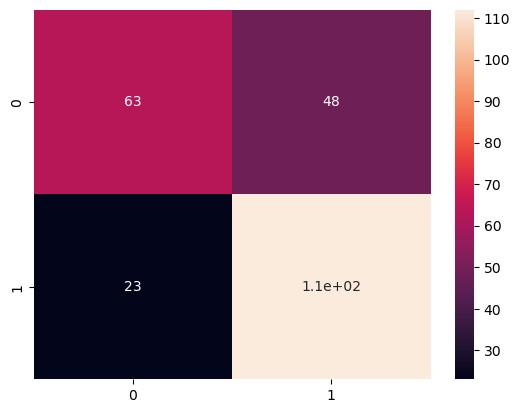

In [308]:
sns.heatmap(data = confusion_matrix(Y_test,grid_logr_predictions),annot = True)

# Conclusion:-

***Here,we analysis all algorithms and see that RandomForest give the best accurancy and also check performance matrix and Classification Report.*** 